In [2]:
import import_ipynb
import plots_help

importing Jupyter notebook from plots_help.ipynb


In [41]:

import PIL
from PIL import Image

for i in range(1,1432):
    img = Image.open('C:\\Users\\Jayant\\Desktop\\ML_mini_prj\\sub27\\' + str(i) + '.png')
    basewidth=64
    wpercent = (basewidth / float(img.size[0]))
    hsize = 64
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    img.save("C:\\Users\\Jayant\\Desktop\\ana\\s27\\"+str(i)+'.png')

In [1]:

import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

In [ ]:

import random
import os
import skimage.io


# our folder path containing some images
folder_path = "C:\\Users\\Jayant\\Desktop\\ML_mini_prj\\background"
# the number of file to generate
num_files_desired = 10

# loop on all files of the folder and build a list of files paths
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

num_generated_files = 0
image_to_transform=None
while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path)

In [ ]:
import os
import random
from scipy import ndarray

import skimage as sk
from skimage import transform
from skimage import util
from skimage import io

def transleft(image_array: ndarray):
    for j in range(480-1):
        for i in range(640-1):
            if (i < 640-20):
                image_array[j][i] = image_array[j][i+20]
    return image_array
def transright(image_array: ndarray):
    for j in range(480-1):
        for i in range(639):
            if (i < 640-20):
                image_array[j][i] = image_array[j][i+20]
    return image_array


def horizontal_flip(image_array: ndarray):
   
    return image_array[:, ::-1]

available_transformations = {
    'trans': transleft,
    'transr': transright,
    'horizontal_flip': horizontal_flip
}

folder_path = "C:\\Users\\Jayant\\Desktop\\ML_mini_prj\\background"

num_files_desired = 450


images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

num_generated_files = 10
while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    image_to_transform = sk.io.imread(image_path)

    num_transformations_to_apply = random.randint(1, len(available_transformations))

    num_transformations = 0
    transformed_image = None
    while num_transformations <= num_transformations_to_apply:
       
        key = random.choice(list(available_transformations))
        transformed_image = available_transformations[key](image_to_transform)
        num_transformations += 1

    new_file_path = '%s/%s.png' % (folder_path, num_generated_files)
    print(num_generated_files)
 
    io.imsave(new_file_path, transformed_image)
    num_generated_files += 1

In [ ]:
##################################################
########################

In [3]:
import cv2
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

import random

In [9]:

#calculates frame rate of a video

In [150]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
import random
import pandas as pd

def frame_ps_video(DEFAULT_VIDEO):
	video = cv2.VideoCapture(DEFAULT_VIDEO)
	 

	(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

	if int(major_ver)  < 3 :
	    fps = video.get(cv2.cv.CV_CAP_PROP_FPS)

	    print( "Frames per second : {0}".format(fps))
	    video.release()
	    return fps
	else :
	    fps = video.get(cv2.CAP_PROP_FPS)
	    print( "Frames per second  : {0}".format(fps))
	    video.release()
	    return fps

eye_remove = False
#can change to true/false

CASCADE_PATH = "haarcascade_frontalface_default.xml"

#DEFAULT_VIDEO = "/home/jayant/Desktop/ML_mini_prj/subject27/vid.avi"  #true val-89bpm
#DEFAULT_VIDEO = "/home/jayant/Desktop/ML_mini_prj/subject4/vid.avi" #true val-110 bpm 
DEFAULT_VIDEO = "/home/jayant/Desktop/ML_mini_prj/subject42/vid.avi"
#DEFAULT_VIDEO = "/home/jayant/Desktop/ML_mini_prj/subject5/vid.avi"

MIN_FACE_SIZE = 100

WIDTH_FRACTION = 0.8 # Fraction of bounding box width to include in ROI
HEIGHT_FRACTION = 1

FPS = frame_ps_video(DEFAULT_VIDEO)
jojo=8   #window_time_sec initialize

if FPS>=20 and FPS<25:
	jojo=10
elif FPS>=25 and FPS<=32 :
	jojo=30
elif FPS>32:
	jojo=20

WINDOW_TIME_SEC = jojo

WINDOW_SIZE = int(np.ceil(WINDOW_TIME_SEC * FPS))
MIN_HR_BPM = 50.0
MAX_HR_BMP = 240.0
MAX_HR_CHANGE = 12.0
SEC_PER_MIN = 60

EYE_LOWER_FRAC = 0.35
EYE_UPPER_FRAC = 0.5





Frames per second  : 29.948009


In [151]:
def roi_util(image, faceBox): 

    widthFrac = WIDTH_FRACTION
    heigtFrac = HEIGHT_FRACTION

    # Adjust bounding box
    (x, y, w, h) = faceBox
    widthOffset = int((1 - widthFrac) * w / 2)
    heightOffset = int((1 - heigtFrac) * h / 2)
    faceBoxAdjusted = (x + widthOffset, y + heightOffset,int(widthFrac * w), int(heigtFrac * h))
    (x, y, w, h) = faceBoxAdjusted
    backgrndMask = np.full(image.shape, True, dtype=bool)
    backgrndMask[y:y+h, x:x+w, :] = False 

    if eye_remove:
        backgrndMask[int(y + h * EYE_LOWER_FRAC) :int( y + h * EYE_UPPER_FRAC), :] = True


    roi = np.ma.array(image, mask=backgrndMask) # Masked array
    return roi


In [155]:

# Sum of square differences between x1, x2, y1, y2 points for each ROI


def distance(roi1, roi2):
    return sum((roi1[i] - roi2[i])**2 for i in range(len(roi1)))

def roi_extract(frame, faceCascade, previousFaceBox):
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(grey, scaleFactor=1.1,minNeighbors=5, minSize=(MIN_FACE_SIZE, MIN_FACE_SIZE), flags=cv2.CASCADE_SCALE_IMAGE)

    roi = None
    faceBox = None

    # If no face detected, use ROI from previous frame
    if len(faces) == 0:
        faceBox = previousFaceBox

    # if many faces detected, use one closest to that from previous frame
    #standard way
    elif len(faces) > 1:
        if previousFaceBox is not None:
            # Find closest
            minDist = float("inf")
            for face in faces:
                if distance(previousFaceBox, face) < minDist:
                    faceBox = face
        else:
            # Chooses largest box by area 
            maxArea = 0
            for face in faces:
                if (face[2] * face[3]) > maxArea:
                    faceBox = face

    # If only one face dectected
    else:
        faceBox = faces[0]

        # Show rectangle
        #(x, y, w, h) = faceBox
        #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 255), 2)
    if faceBox is not None:
        roi = roi_util(frame, faceBox)

    return faceBox, roi


In [141]:
def graph_sig(signal):
    fig = plt.figure()
    seconds = np.arange(0, WINDOW_TIME_SEC, float(1/ FPS))
    diff = ["r", "g", "b"]
    
    
    
    plt.plot(seconds, signal[:,0], diff[0])
    plt.plot(seconds, signal[:,1], diff[1])
    plt.plot(seconds, signal[:,2], diff[2])
      
    plt.xlim(0,30)
    plt.grid(axis="x", color="green", alpha=.3, linewidth=2, linestyle=":")
    plt.grid(axis="y", color="black", alpha=.5, linewidth=.5)
    plt.xlabel('time (sec)')
    plt.ylabel("Decomposed signal")

    plt.show()


In [142]:
def plot_hr(ref):
    time = range(48)
    plt.figure()
    plt.plot(time, ref)
    plt.xlabel("instant")
    plt.ylabel("Heart rate variability")
    plt.show()

In [101]:
def power_gr(freq, power):
  
    #fig = plt.figure()
    
    plt.plot(freq, power[:,0])
    plt.plot(freq, power[:,1])
    plt.plot(freq, power[:,2])
  
    plt.xlim(0,4)
    plt.grid(axis="x", color="green", alpha=.3, linewidth=2, linestyle=":")
    plt.grid(axis="y", color="black", alpha=.5, linewidth=.5)
    

    plt.xlabel("Freq (Hz)")
    plt.ylabel("power")
    plt.show()

In [156]:

def extract_heartrate(window, lastHR):
    # Normalize across the window to have zero-mean and unit variance
    mean = np.mean(window, axis=0)
    std = np.std(window, axis=0)
    normalized = (window - mean) / std

    # decompose into three source signals using ICA
#     ica = FastICA(tol=0.01)
#     srcSig = ica.fit_transform(normalized)
    
    pca = PCA(n_components=3)
    srcSig = pca.fit_transform(normalized)
    #uncommment to decompose using PCA

    # Find power spectrum
    powerSpec = np.abs(np.fft.fft(srcSig, axis=0))**2
    freqs = np.fft.fftfreq(WINDOW_SIZE, 1.0 / FPS)

    # Find heart rate
    maxPwrSrc = np.max(powerSpec, axis=1)
    validIdx = np.where((freqs >= MIN_HR_BPM / SEC_PER_MIN) & (freqs <= MAX_HR_BMP / SEC_PER_MIN))
    validPwr = maxPwrSrc[validIdx]
    validFreqs = freqs[validIdx]
    maxPwrIdx = np.argmax(validPwr)
    hr = validFreqs[maxPwrIdx]
    print (hr) #printing heart beats/sec as time window slides

   # graph_sig(srcSig)
   # power_gr(freqs,powerSpec)

    #print("mecca")
    return hr


In [158]:


video = cv2.VideoCapture( DEFAULT_VIDEO)
faceCascade = cv2.CascadeClassifier(CASCADE_PATH)

colorSig = [] # Will store the average RGB color values in each frame's ROI
heartRates = [] # Will store the heart rate calculated every 1 second
previousFaceBox = None
dd=0
memset=None
while True:
    # Capture frame-by-frame
    ret, frame = video.read()
    if not ret:
        break

    previousFaceBox, roi = roi_extract(frame, faceCascade, previousFaceBox)
    #print(previousFaceBox) #eg--[275 181 160 160]
#     cc=1
#     if(cc==1):
#         print(roi)
#         cc+=1

    if (roi is not None) and (np.size(roi) > 0):
        colorChannels = roi.reshape(-1, roi.shape[-1])
        
        if dd==0:
           # print(colorChannels)
            memset=colorChannels
            dd+=1
            
            
        avgColor = colorChannels.mean(axis=0)
        colorSig.append(avgColor)
   # print(len(colorSig))

    # Calculate heart rate every one second (once have 10sec or 15 sec or 20 sec of data depends on jojo)
    if (len(colorSig) >= WINDOW_SIZE) and (len(colorSig) % np.ceil(FPS) == 0):
        windowStart = len(colorSig) - WINDOW_SIZE
        window = colorSig[windowStart : windowStart + WINDOW_SIZE]
        lastHR = heartRates[-1] if len(heartRates) > 0 else None
        heartRates.append(extract_heartrate(window, lastHR))

    if np.ma.is_masked(roi):
        roi = np.where(roi.mask == True, 0, roi)
    
    cv2.imshow('Image',roi)
    cv2.waitKey(1)

print()
print( "just a theoretical mean ",np.mean(heartRates)*60)
print()
print("Instances captured --",len(heartRates))
 
pd.DataFrame(heartRates).to_csv("result_bps.csv")
video.release()
cv2.destroyAllWindows()

1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.5990038175750834
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.6323163971078978
1.7322541357063403
1.7322541357063403
1.7322541357063403
1.6323163971078978


KeyboardInterrupt: 

In [104]:
temp=[60*rr for rr in heartRates[0:48]]

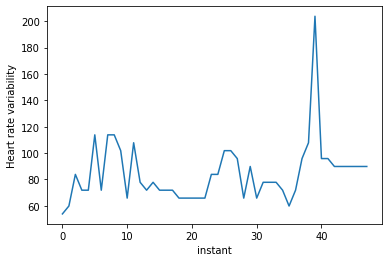

In [108]:
plot_hr(temp)

In [33]:
import pandas as pd
import numpy as np
addr='/home/jayant/Desktop/ML_mini_prj/subject5/ground_truth.txt'
ground_truth = pd.read_fwf(addr,sep=" ", header=None)
ground_truth.sum(axis = 1, skipna = True)[1]/ground_truth.shape[1]


98.2769141935484

In [21]:
import pandas as pd
data = {'Actual Heart Rate':['94', '89', '110', '98','91'],' ICA decomposition':[98,85,95,99,94],' MAE of ICA decomposition':[4,4,15,1,3],' PCA decomposition':[99,81,85,84,82],' MAE of PCA decomposition':[3,8,25,14,9]}
df = pd.DataFrame(data, index=[' Subject 42',' Subject 27',' Subject 4',' Subject 5',' Subject 25'])
print("Haar Cascade Segmentation")
df

Haar Cascade Segmentation


,Actual Heart Rate,ICA decomposition,MAE of ICA decomposition,PCA decomposition,MAE of PCA decomposition
Subject 42,94,98,4,99,3
Subject 27,89,85,4,81,8
Subject 4,110,95,15,85,25
Subject 5,98,99,1,84,14
Subject 25,91,94,3,82,9
